<a href="https://colab.research.google.com/github/thiago-lima26/IA/blob/master/Exerc%C3%ADcio_2_Machine_Learning_Upis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício 2 - Machine Learning

#### Data de entrega: 18/09/2020 - Nota: 10

O RMS Titanic foi um navio de passageiros britânico que afundou no Oceano Atlântico Norte nas primeiras horas da manhã de 15 de abril de 1912, após colidir com um iceberg durante sua viagem inaugural de Southampton para a cidade de Nova York. Havia cerca de 2.224 passageiros e tripulantes a bordo do navio, e mais de 1.500 morreram, tornando-o um dos desastres marítimos comerciais mais mortíferos em tempos de paz da história moderna. O RMS Titanic era o maior navio à tona na época em que entrou em serviço e foi o segundo de três transatlânticos da classe Olímpica operados pela White Star Line. O Titanic foi construído pelo estaleiro Harland and Wolff em Belfast. Thomas Andrews, seu arquiteto, morreu no desastre.

In [374]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from pydot import graph_from_dot_data
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz

In [375]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

### Dicas

O aluno pode selecionar qual o tipo de modelo ele gostaria de implementar para descobrir de forma preditiva quantas pessoas em um determinado modelo poderá aumentar os sobreviventes.

#### OBS: Já tem alguns imports que pode ajudar em qual modelo usar.

In [376]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [377]:
train_df = train_df.drop(['Fare'], axis=1)
train_df = train_df.drop(['Name'], axis=1)
train_df = train_df.drop(['Ticket'], axis=1)
train_df = train_df.drop(['Embarked'], axis=1)

In [378]:
test_df = test_df.drop(['Fare'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Embarked'], axis=1)

#Tratando a Classe Cabine e Criando níveis

In [379]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [380]:
# Agora podemos excluir a variavel cabine
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

#Convertendo a idade para int

In [381]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # computar números aleatórios entre a média, std e is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # preencher valores NaN na coluna Idade com valores aleatórios gerados
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

#Convertendo o sexo para int

In [382]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [383]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
X_test  = test_df.copy()

In [384]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Deck
0,1,3,0,22,1,0,8
1,2,1,1,38,1,0,3
2,3,3,1,26,0,0,8
3,4,1,1,35,1,0,3
4,5,3,0,35,0,0,8


In [385]:
feature_cols = ['PassengerId', 'Pclass', 'Sex', 'Age','SibSp','Parch','Deck']
X = X_train[feature_cols] # Features

In [395]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Deck         418 non-null    int64
dtypes: int64(7)
memory usage: 23.0 KB


In [387]:
objectDT = DecisionTreeClassifier()
objectDT.fit(X_train,y_train)
y_pred = objectDT.predict(X_test)

In [388]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [389]:
acc_decision_tree = round(objectDT.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

100.0 %


In [392]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2,), "%")

76.54 %


In [393]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('gender_submission.csv', index=False)

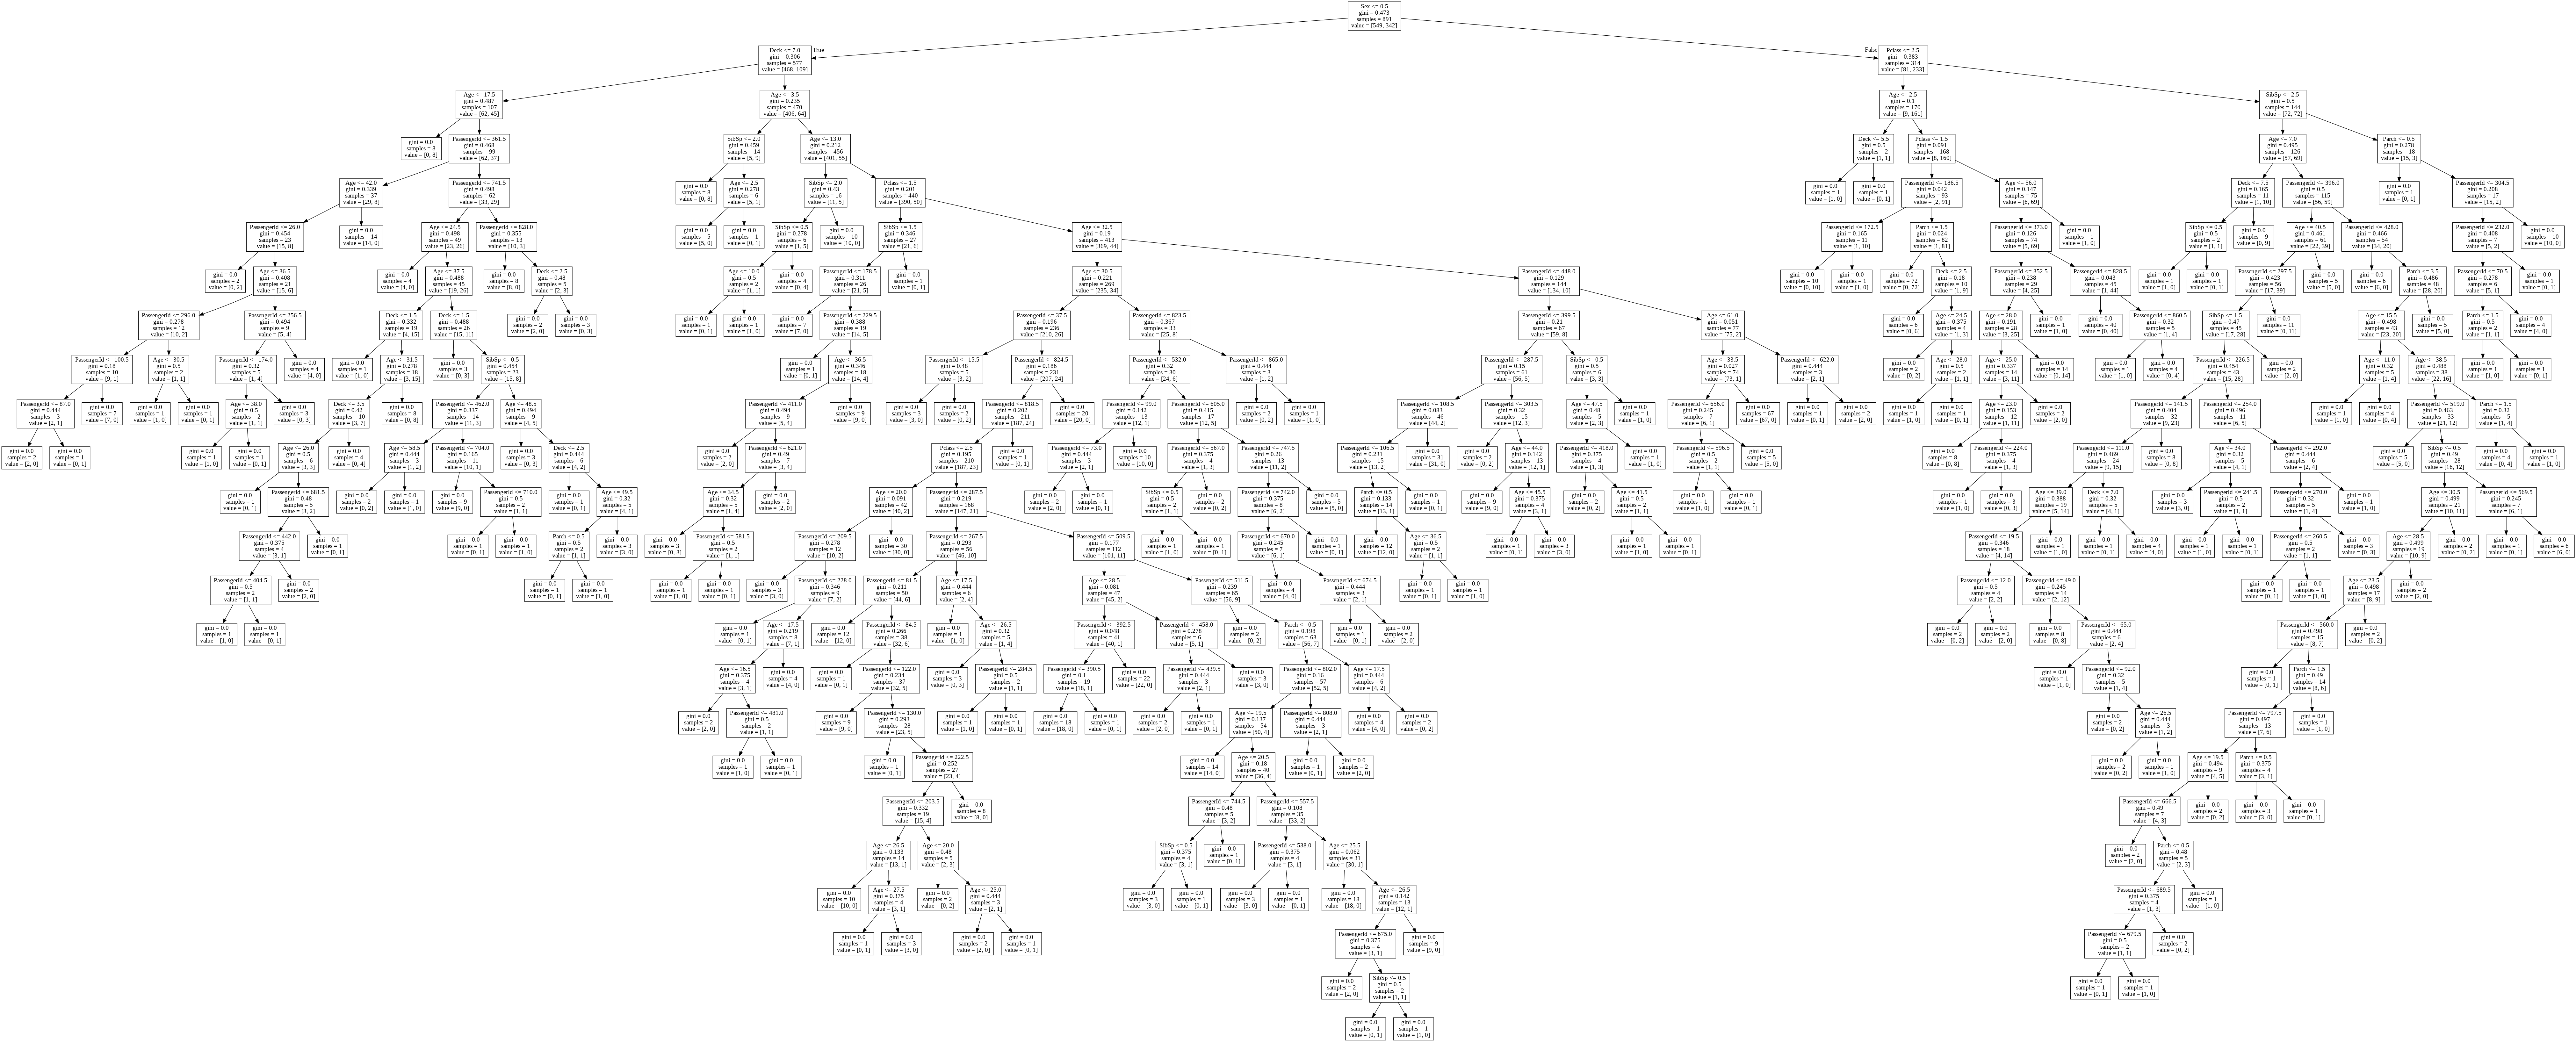

In [397]:
dot_data = StringIO()

export_graphviz(objectDT, out_file=dot_data, feature_names=X.columns)

(graph, ) = graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())